In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Cargar el conjunto de datos
pd.read_csv("covid.csv")
df = pd.read_csv("covid.csv")
df.head()

eliminar_columnas = ['id', 'patient_type','entry_date','date_symptoms','date_died','other_disease','icu']
df.drop(eliminar_columnas, axis=1, inplace=True)
df.head()

df=df[df['covid_res']!= 3]
df=df[df['contact_other_covid']!= 99]
df=df[df['tobacco']!= 98]
df=df[df['obesity']!= 98]
df=df[df['copd']!= 98]
df=df[df['diabetes']!= 98]
df=df[df['asthma']!= 98]
df=df[df['inmsupr']!= 98]
df=df[df['hypertension']!= 98]
df=df[df['cardiovascular']!= 98]
df=df[df['renal_chronic']!= 98]
df=df[df['intubed']!= 98]
df=df[df['pregnancy']!= 98]
df=df[df['pneumonia']!= 98]

In [3]:
X = df.drop('covid_res', axis=1)
y = df['covid_res']

In [4]:
#dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
model=KNeighborsClassifier(n_neighbors=5)

In [7]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = model.predict(X_test)

In [20]:
#Evaluamos el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
print("La presicion del modelo es: ", accuracy *100)

La presicion del modelo es:  58.67307785710817


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

features = ['sex','intubed','pneumonia', 'age', 'pregnancy','diabetes','copd', 'asthma','inmsupr','hypertension','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid']

target='covid_res'

X=df[features]
y=df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_mat=confusion_matrix(y_test, y_pred)

print(conf_mat)

[[17047 24394]
 [18150 43354]]


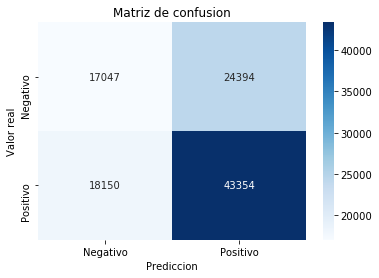

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])

ax.set_xlabel('Prediccion')
ax.set_ylabel('Valor real')
ax.set_title('Matriz de confusion')

plt.show()